In [1]:
%store -r preprocessed_data
%store -r lemmatized_data
%store -r cleaned_data

**NLP with LDA**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the preprocessed data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_data)

# Apply LDA for topic modeling
num_topics = 5  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

n_top_words = 5  # Adjust the number of top words to display
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)

Topic #1: score hour feel range data
Topic #2: device score tracking community dream
Topic #3: heart rate resting graph sleeping
Topic #4: moving sense visit lifestyle increase
Topic #5: hour awake deep rem setting


**Sentiment Analysis**

In [3]:
import textblob
from textblob import TextBlob

# Analyze sentiment for each paragraph
sentiments = [TextBlob(text).sentiment for text in preprocessed_data]
sentiments2 = [TextBlob(text).sentiment for text in cleaned_data]

In [4]:
sentiments

[Sentiment(polarity=0.3, subjectivity=0.2),
 Sentiment(polarity=0.2, subjectivity=0.6),
 Sentiment(polarity=0.25, subjectivity=0.25),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.040873015873015874, subjectivity=0.444047619047619),
 Sentiment(polarity=-0.00833333333333334, subjectivity=0.7083333333333334),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.15, subjectivity=0.5458333333333333),
 Sentiment(polarity=0.4, subjectivity=1.0),
 Sentiment(polarity=0.1, subjectivity=0.4),
 Sentiment(polarity=0.3, subjectivity=0.44999999999999996),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.5, subjectivity=0.5),
 Sentiment(polarity=0.0, subjectivity=0.1),
 Sentiment(polarity=0.0

**WordCloud**

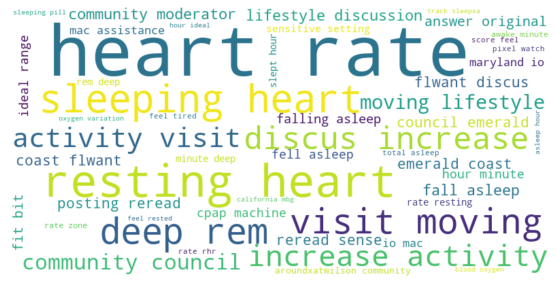

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create a WordCloud object
# Concatenate the list of preprocessed and lowercased text into a single string
your_text_corpus = ' '.join(preprocessed_data)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, collocation_threshold=5).generate(your_text_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud.png')

In [6]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from heapq import nlargest

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
doc = nlp('\n'.join(cleaned_data))

# Flatten the list of lists into a single list of words
flattened_tokens = [word for sublist in lemmatized_data for word in sublist]

# Calculate word frequency
word_freq = {}
for word in flattened_tokens:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Calculate sentence scores based on word frequency
sentence_scores = {}
for sent in doc.sents:
    for word in sent:
        if word.text in word_freq:
            if sent in sentence_scores:
                sentence_scores[sent] += word_freq[word.text]
            else:
                sentence_scores[sent] = word_freq[word.text]

# Get the top N sentences as the summary
summary_sentences = nlargest(1, sentence_scores, key=sentence_scores.get)

# Generate the summary
summary = " ".join([str(sentence) for sentence in summary_sentences])

In [7]:
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

In [8]:
sorted_word_freq

{'heart': 256,
 'hour': 217,
 'rate': 216,
 'score': 209,
 'deep': 182,
 'sleeping': 141,
 'asleep': 140,
 'awake': 134,
 'data': 121,
 'device': 119,
 'rem': 118,
 'minute': 103,
 'feel': 101,
 'night': 90,
 'log': 88,
 'year': 87,
 'wake': 85,
 'setting': 83,
 'tracking': 81,
 'resting': 80,
 'issue': 80,
 'graph': 79,
 'community': 76,
 'doesnt': 70,
 'range': 70,
 'problem': 68,
 'sense': 64,
 'tracker': 63,
 'charge': 63,
 'day': 61,
 'slept': 61,
 'spike': 61,
 'week': 60,
 'premium': 59,
 'morning': 59,
 'people': 58,
 'track': 56,
 'work': 56,
 'stage': 56,
 'moving': 55,
 'activity': 55,
 'xai': 55,
 'wear': 54,
 'accurate': 54,
 'wrist': 52,
 'health': 52,
 'average': 51,
 'post': 51,
 'apnea': 51,
 'sensitive': 50,
 'tired': 50,
 'reading': 50,
 'bit': 49,
 'sleepxa': 48,
 'total': 48,
 'high': 48,
 'answer': 48,
 'watch': 47,
 'step': 47,
 'oxygen': 47,
 'rhr': 47,
 'didnt': 45,
 'woke': 45,
 'cpap': 45,
 'set': 44,
 'number': 44,
 'increase': 44,
 'doctor': 44,
 'phone': 4

In [9]:
with open("summary.txt", 'w', encoding='utf-8') as file:
    # Write the string to the file
    file.write(summary)